## Problem Statement 3: 
You have to create a linear regression model in Python or R to predict the CTC/Salary of new hires from the data provided.

### How to predict salary using Linear Regression

Step 1: Load the Dataset....
Step 2: Split dataset into training set and test set.
Step 3: Fit Simple Linear Regression model to training set.
Step 4: Predict the test set.
Step 5 — Visualizing the training set.
Step 6 — Visualizing the test set.
Step 7 — Make new predictions.

### Importing Libraries

1) Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. It is built on top of another package named Numpy, which provides support for multi-dimensional arrays.

2)NumPy is a Python library used for working with arrays.

3)The OS module in Python provides functions for interacting with the operating system. OS comes under Python's standard utility modules.

4)Pickle in Python is primarily used in serializing and deserializing a Python object structure.

In [1]:
import pandas as pd
import numpy as np
import os
import pickle

# Reading the Train Data File

### 1. Load the Dataset
In the real world, a Pandas DataFrame will be created by loading the datasets from existing storage, storage can be SQL Database, CSV file, and Excel file.

In [2]:
data = pd.read_excel(r"C:\Users\sumanth\OneDrive\Documents\Internship\Data_file.xlsx")

In [3]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
2,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
3,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
4,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
...,...,...,...,...,...,...,...,...,...
1335,1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1336,1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1337,1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1338,1337,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


### NAN
NaN stands for "Not A Number" and is one of the common ways to represent the "missing value" in the data. It is a special floating-point value and cannot be converted to any other type than float. NaN value is one of the major problems in Data Analysis.

We can replace NaN values with 0 to get rid of NaN values. This is done by using fillna() function that will check the NaN values in the dataframe columns and fill the given value.

While analyzing the real datasets which are often very huge in size, we might need to get the column names in order to perform some certain operations.

In [4]:
data.columns = ["S.No","College","Role","City type","Previous CTC","Previous job changes","Graduation marks","Exp (Months)","CTC"]



 Using the iloc() function in python, we can easily retrieve any particular value from a row or column using index values.

In [5]:
df = data.iloc[2: , 1:]


In [6]:
df

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
2,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
3,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
4,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
5,Tier 3,Executive,Metro,49010,2,81,33,82092.38688
6,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...
1335,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1336,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1337,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1338,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


### Categorical Data


Categorical Data:

1. A categorical variable is a type of variable in statistics that represents a limited and often fixed set of values. Ex: gender (where there are two values, male and female) or blood types (which can be one of the small sets of types of blood, such as A, B, and O).

2. This is in contrast to continuous variables, which can represent an infinite number of values.

3. Pandas has the ability to represent Categorical variables using a type of pandas object known as Categorical.

4. These pandas objects are designed to efficiently represent data that is grouped into a set of buckets, each represented by an integer code that represents one of the categories.

5. The use of these underlying codes gives pandas the ability to efficiently represent sets of categories and to perform ordering and comparisons of data across multiple categorical variables

In [7]:
lmh_values = ["Tier1", "Tier2", "Tier3"]
lmh_cat = pd.Categorical(lmh_values)
lmh_cat


['Tier1', 'Tier2', 'Tier3']
Categories (3, object): ['Tier1', 'Tier2', 'Tier3']

In [8]:
type(lmh_cat)

pandas.core.arrays.categorical.Categorical

In [9]:
#The Categorical has created an index consisting of the three distinct values in the provided list.
lmh_cat.categories

Index(['Tier1', 'Tier2', 'Tier3'], dtype='object')

In [10]:
# .codes shows the integer mapping for each value of the categorical
lmh_cat.codes

array([0, 1, 2], dtype=int8)

### NO NULL VALUES

In [11]:
df.isna().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

### Dummy Variables

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables. A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value. Eg: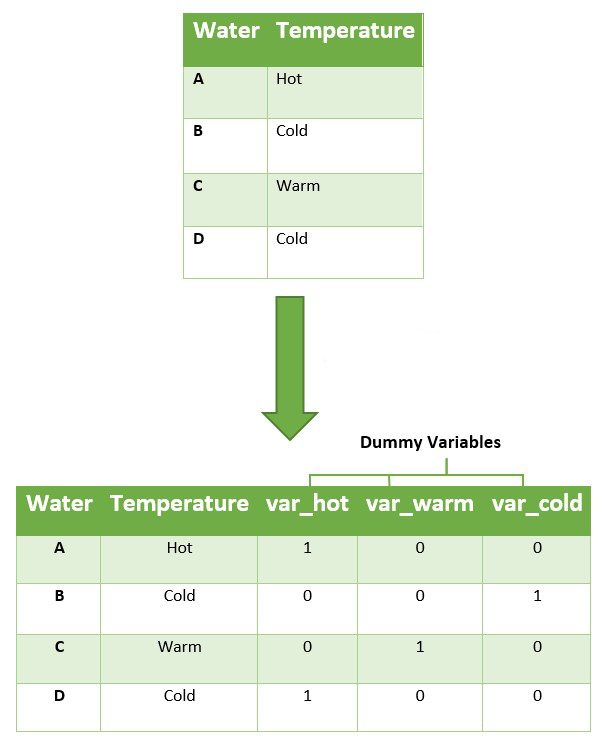 


### Creating dummies for categorical variables 

### drop_first=True
 It is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

In [12]:
df1 = pd.get_dummies(df, columns=['College', 'Role', 'City type'], drop_first=True)


In [13]:
df1

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
2,55523,3,66,19,71406.576531,0,0,1,1
3,57081,1,84,18,68005.870631,1,0,0,0
4,60347,2,52,28,76764.020277,1,0,0,0
5,49010,2,81,33,82092.38688,0,1,0,0
6,57879,4,74,32,73878.097729,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1335,59661,4,68,50,69712.403655,0,1,0,0
1336,53714,1,67,18,69298.750099,0,0,0,1
1337,61957,1,47,18,66397.770686,1,0,0,1
1338,53203,3,69,21,64044.382949,0,0,0,1


# Defining Training and Testing data

In [14]:
X = df1.drop("CTC",axis=1)   #Feature Matrix
Y = df1["CTC"]   

In [15]:
X

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
2,55523,3,66,19,0,0,1,1
3,57081,1,84,18,1,0,0,0
4,60347,2,52,28,1,0,0,0
5,49010,2,81,33,0,1,0,0
6,57879,4,74,32,0,1,0,0
...,...,...,...,...,...,...,...,...
1335,59661,4,68,50,0,1,0,0
1336,53714,1,67,18,0,0,0,1
1337,61957,1,47,18,1,0,0,1
1338,53203,3,69,21,0,0,0,1


In [16]:
Y

2       71406.576531
3       68005.870631
4       76764.020277
5        82092.38688
6       73878.097729
            ...     
1335    69712.403655
1336    69298.750099
1337    66397.770686
1338    64044.382949
1339    83346.060961
Name: CTC, Length: 1338, dtype: object

# Regression Analysis

What is Regression?
Regression analysis is a statistical method that helps us to understand the relationship between dependent and one or more independent variables,

Dependent Variable
This is the Main Factor that we are trying to predict.

Independent Variable
These are the variables that have a relationship with the dependent variable.

Now, the task is to find a line that fits best in the above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in a dataset)
This line is called a regression line.
The equation of regression line is represented as:
Y = \beta _0 + \beta_1x_i    


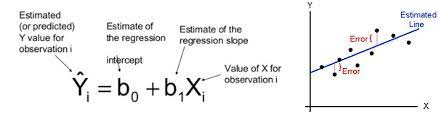

Here,  

'Y' represents the predicted response value for ith observation.
b_0 and b_1 are regression coefficients and represent y-intercept and slope of regression line respectively.

To create our model, we must “learn” or estimate the values of regression coefficients b_0 and b_1. And once we’ve estimated these coefficients, we can use the model to predict responses.

In this, we are going to use the principle of  Least Squares.
Now consider:
y_i = \beta_0 + \beta_1x_i + \varepsilon_i = h(x_i) + \varepsilon_i \Rightarrow \varepsilon_i = y_i -h(x_i)    
Here, e_i is a residual error in ith observation. 
So, our aim is to minimize the total residual error.

We define the squared error or cost function, J as: 
J(\beta_0,\beta_1)= \frac{1}{2n} \sum_{i=1}^{n} \varepsilon_i^{2} 

and our task is to find the value of b_0 and b_1 for which J(b_0,b_1) is minimum.

Without going into the mathematical details, we present the result here:
\beta_1 = \frac{SS_{xy}}{SS_{xx}}    
\beta_0 = \bar{y} - \beta_1\bar{x} 

where SS_xy is the sum of cross-deviations of y and x: 
SS_{xy} = \sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y}) = \sum_{i=1}^{n} y_ix_i - n\bar{x}\bar{y}    
and SS_xx is the sum of squared deviations of x: 
SS_{xx} = \sum_{i=1}^{n} (x_i-\bar{x})^2 = \sum_{i=1}^{n}x_i^2 - n(\bar{x})^2    



### Creating Object for Linear Regression

In [17]:
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt

reg = linear_model.LinearRegression()

In [18]:
### Training the Model

In [19]:
# train the model using the training sets
reg.fit(X,Y)

LinearRegression()

# Pickel Model

Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.

### Saving the Model

The pickle module can store things such as data types such as booleans, strings, and byte arrays, lists, dictionaries, functions 
However, the point is to save an object to a file for later retrieval.

In [20]:
pickle.dump(reg, open('linear_model.pkl', 'wb'))

### Loading the Saved Model

### To load a saved model:

All you need to do is pass the “pickled” model into the Pickle load() function and it will be deserialized.
By assigning this back to a model object, you can then run your original model's predict() function, pass in some test data and get back an array of predictions. 

In [21]:
pickled_model = pickle.load(open('linear_model.pkl', 'rb'))

### Reading the Test data file

In [22]:
test = pd.read_excel(r"C:\Users\sumanth\OneDrive\Documents\Internship\Test_data_file - Copy.xlsx")

In [23]:
test

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


### Creating dummies for categorical variables 

In [24]:
dg = pd.get_dummies(test, columns=['College', 'Role', 'City type'], drop_first=True)

In [25]:
dg

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,69712.403655,0,1,0,0
1334,53714,1,67,18,69298.750099,0,0,0,1
1335,61957,1,47,18,66397.770686,1,0,0,1
1336,53203,3,69,21,64044.382949,0,0,0,1


### Defining Training and Testing data

In [26]:
A = dg.drop("CTC",axis=1)   #Feature Matrix
B = dg["CTC"] 

### Evaluating the Test data 

In [27]:
pred = pickled_model.predict(A)
accuracy = pickled_model.score(A,B)

In [28]:
pred

array([86123.93814045, 65789.54652723, 69941.69030152, ...,
       64046.07444784, 66223.22234281, 90794.94065705])

### Visualization of the Train and Test data

Coefficients:  [ 4.51593157e-01 -2.90410713e+01 -3.65235016e+00  2.58940639e+02
 -5.49200632e+03 -4.65973166e+03  1.93599439e+04 -4.08057727e+03]
Variance score: 0.6081873160506195


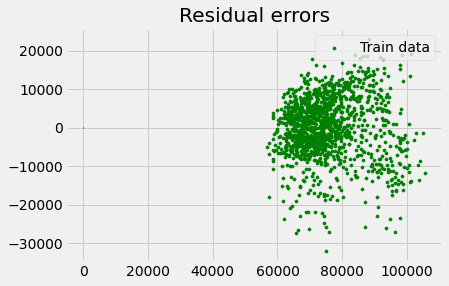

In [29]:
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X,Y)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X), reg.predict(X) - Y,
            color = "green", s = 10, label = 'Train data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

Coefficients:  [ 4.51593157e-01 -2.90410713e+01 -3.65235016e+00  2.58940639e+02
 -5.49200632e+03 -4.65973166e+03  1.93599439e+04 -4.08057727e+03]
Variance score: 0.6081873160506195


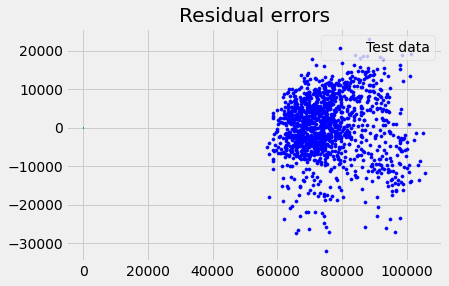

In [30]:
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X,Y)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  

## plotting residual errors in test data
plt.scatter(reg.predict(A), reg.predict(A) - B,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Coefficients:  [ 4.51593157e-01 -2.90410713e+01 -3.65235016e+00  2.58940639e+02
 -5.49200632e+03 -4.65973166e+03  1.93599439e+04 -4.08057727e+03]
Variance score: 0.6081873160506195


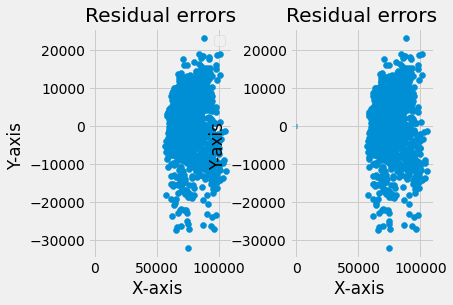

In [31]:
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X,Y)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(reg.predict(X), reg.predict(X) - Y)
plt.title("My first plot!")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

#plt.tight_layout()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
plt.subplot(1, 2, 2) # index 2
plt.scatter(reg.predict(A), reg.predict(A) - B)
plt.title("My second plot!")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 5)
  
## plotting legend
#plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
plt.show()

In [32]:
accuracy

0.6081873160506195

### Creating a Dataframe in Pandas

In [33]:
df = pd.DataFrame()


In [34]:
df


""


In [35]:

data = [[55523,3,66,19,71406.576531,0,0,1,1]]
  
# Create the pandas DataFrame
sample_data = pd.DataFrame(data, columns=["Previous CTC","Previous job changes","Graduation marks","Exp (Months)","CTC","College_Tier 2","College_Tier 3","Role_Manager","City type_Non-Metro"])
  
# print dataframe.
sample_data

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1


### Defining Sample Train and Test data for Prediction

In [36]:
A_sample_data = sample_data.drop("CTC",axis=1)   #Feature Matrix
B_sample_data = sample_data["CTC"] 

In [37]:
pred = pickled_model.predict(A_sample_data)

In [38]:
pred

array([86123.93814045])